# Домашняя работа №4
Скачиваем датасет ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv).

или можно через ноутбук

!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv

как альтернатива можно скачать данные из Роспотребнадзора 
https://zpp.rospotrebnadzor.ru/Forum/Appeals
для этого берём ноутбук `parse_rospotrebnadzor.ipynb`
устанавливаем количество скачанных страниц больше не 50-сят хотябы 500 и для анализа берём только вопросы так как ответы есть не всегда

что надо сделать 
1. объединить в одну выборку (это только для твитов), для роспотребнадзора сформировать датасет из вопросов
2. провести исследование и выявить тематики о которых говорят в твитах (для твитов), а для роспотребнадзора так же выявить тематики о которых люди пишут проанализировать
3. сделать визуализацию кластеров тематик
4. проинтерпритировать получившиеся тематики



### 1. объединить в одну выборку (это только для твитов), для роспотребнадзора сформировать датасет из вопросов

In [44]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

C:\Users\60053972\AppData\Local\Temp\ipykernel_23764\331133830.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


Вопросы с сайта Росподребнадзора я спарсил заранее. Загрузим этот датасет.

In [45]:
question = pd.read_csv('question.csv')
question

,0
0,"Прошу Вас разобраться с магазином""Связной"" По адресу Орловская обл. Ливенский р-он г. Ливны. Ул м. Горького д 7.претензия заключается в следующем:в данном магазине 16.10.2022 г. В 15:51 мск был куплен телефон Infinite Hot 12i и медиаплеер Sber box. Куплен был в кредит. Чек не предоставили, забрала только на следующий день. В данном чеке, мы увидели что сумма превышает стоимость телефона и медиаплеера, начали спрашивать у продавца, ответ не получили. В чеке прописаны и оформлены в кредит сим карты мегафон 3 гшт по цене 1150.смс информирование 990 р. Защита кредита 490 р. Яндекс. Плюс мульти 2990.общая сумма моей покупки составила 19900.при том что я просила только телефон стоимость которого 8990 и медиаплеер стоимость которого 2990.Горячая линия данного магазина ""Связной ""отказалась решить тот вопрос."
1,"Добрый день!\r\nПосле увольнения по собственному желанию не отдают трудовую книжку и запрошенные справки 2ндфл.\r\nПо телефону не берут трубку, чтобы можно было уточнить где и как можно забрать вышеупомянутую , прямой руководитель не отвечает( не берет трубку)\r\nОрганизация АО Почта России"
2,"21.09.2022 была заказана куртка Nike на озон ( в описании товара был заявлен этот бренд) после ожидания, длинною почти в месяц, 20.10.2022 эта куртка была мною получена. При осмотре куртки выяснилось, что куртка является контрафактной, имеет несоответствующие бирки. Поддержка озон предлагает лишь возврат товара, однако этот вариант меня не устраивает. Могу ли я получить моральную компенсацию? Прилагаю фотографии"
3,"Добрый вечер . Прошу обратить ваше внимание на так называемый медицинский центр «МИР ЗДОРОВЬЯ» , располагающегося по адресу г.Орел ул.Октябрьская 57. Обманывают пенсионеров , вводят в заблуждение . Абсолютно здоровый человек пройдя там бесплатную диагностику услышит , что для полного выздоровления ему необходимо у них купить приборы и препараты на сумму 200т + т.р. Предлагают рассрочки . Люди несут туда последние деньги ради чудесного исцеления.Всему этому есть подтверждение . Мошенники ."
4,"Я, Морозова Елена Николаевна обращаюсь с жалобой на соседку живущую этажом выше Анну Нечипас ранее судимую, проживающую по адресу г. Тверь, Петербургское шоссе д. 50, кв. 312. На меня просачиваются нечистоты от соседки этажом выше. Управляющая компания воду ей отключила и холодную и горячую, т.к. у нее не был подсоединен унитаз и все что туда попадало все стекало в мою квартиру и она периодически меня заливала, то просто водой, то фекалиями. Сейчас она справляет нужду где попало и заливает водой из ведра, которую ей дают соседи, когда поднималась к ней видела у нее залитый пол. У меня в комнате за шкафом образовалась теч, капало и воняло фекалиями. Сейчас дома вонь, дома открыто окно, т.к. не возможно дышать вонью, очень холодно. Обращалась в полицию, мне ответили, что вопросами залива они не занимаются. Что подобные бытовые вопросы я должна решать сама. Анна Нечипас (соседка сверху) постоянно находится в наркотическом опьянении, по этой причине договорится с ней не представляется возможным. Я пыталась с ней разговаривать, но Нечипас проявляет полную неадекватность. Помогите решить этот вопрос!"
...,...
990,"Здравствуйте.\r\nВ нашем доме есть мусоропровод, однако некоторые жильцы не утруждаются подняться/спуститься на полэтажа и оставляют мусор у подъезда. По некоторым из жильцов имеются доказательства их причастности, установлены камеры. К управляющей компании претензий нет – они убирают четко, каждый день, за исключением выходных. Однако тем не менее иногда могут скапливаться большие кучи бытовых отходов, которые воняют, и в целом не радуют глаз. Насколько я знаю, УК штрафовать таких жильцов не имеет права, тем не менее исходя из изученной мною информации, действия жильцов не вполне законны.\r\nВ связи с этим, подскажите, пожалуйста, куда можно обратиться для решения данной ситуация, как можно повлиять на тех, кто мусорит?"
991,"Заказывала платья на сайте hardbofrty.ru, в итоге через Почту России пришла какая-то непонятная р

In [58]:
data = question["0"].to_list()

In [61]:
data[:3]

['Прошу Вас разобраться с магазином"Связной" По адресу Орловская обл. Ливенский р-он г. Ливны. Ул м. Горького д 7.претензия заключается в следующем:в данном магазине 16.10.2022 г. В 15:51 мск был куплен телефон Infinite Hot 12i и медиаплеер Sber box. Куплен был в кредит. Чек не предоставили, забрала только на следующий день. В данном чеке, мы увидели что сумма превышает стоимость телефона и медиаплеера, начали спрашивать у продавца, ответ не получили. В чеке прописаны и оформлены в кредит  сим карты мегафон 3 гшт по цене 1150.смс информирование 990 р. Защита кредита 490 р. Яндекс. Плюс мульти 2990.общая сумма моей покупки составила 19900.при том что я просила только телефон стоимость которого 8990 и медиаплеер стоимость которого 2990.Горячая линия данного магазина "Связной "отказалась решить тот вопрос. ',
 'Добрый день!\r\nПосле увольнения по собственному желанию не отдают трудовую книжку и запрошенные справки 2ндфл.\r\nПо телефону не берут трубку, чтобы можно было уточнить где и как 

In [60]:
len(data)

995

### 2. провести исследование и выявить тематики о которых говорят в твитах (для твитов), а для роспотребнадзора так же выявить тематики о которых люди пишут проанализировать

### Предобработка


Все модели, с которыми мы будем работать далее, работают с предобработанными текстами, поэтому сперва проведем стандартную предобработку текста:

In [62]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
from pymystem3 import Mystem

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\60053972\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

c:\Users\60053972\Anaconda3\envs\DS_in_medicine_2\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
c:\Users\60053972\Anaconda3\envs\DS_in_medicine_2\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
c:\Users\60053972\Anaconda3\envs\DS_in_medicine_2\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
c:\Users\60053972\Anaconda3\envs\DS_in_medicine_2\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is depre

In [65]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian')

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords 
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
C:\Users\60053972\AppData\Local\Temp\ipykernel_23764\2389405028.py:1: DeprecationWarning: invalid escape sequence \w
  words_regex = re.compile('\w+')


In [67]:
data[1]

'Добрый день!\r\nПосле увольнения по собственному желанию не отдают трудовую книжку и запрошенные справки 2ндфл.\r\nПо телефону не берут трубку, чтобы можно было уточнить где и как можно забрать вышеупомянутую , прямой руководитель не отвечает( не берет трубку)\r\nОрганизация АО Почта России'

In [68]:
print(preprocess(data[1]))

['добрый', 'день', 'увольнение', 'собственный', 'желание', 'отдавать', 'трудовой', 'книжка', 'запросить', 'справка', 'телефон', 'брать', 'трубка', 'уточнить', 'забрать', 'вышеупомянутый', 'прямой', 'руководитель', 'отвечать', 'брать', 'трубка', 'организация', 'почта', 'россия']


Ниже мы оставим только случайные 10,000 текстов из нашей коллекции, чтобы ускорить вычисления:

In [69]:
preprocessed_text = list(tqdm(map(preprocess, data), total=len(data)))

  0%|          | 0/995 [00:00<?, ?it/s]

In [70]:
data = preprocessed_text
data[:3]

[['просить',
  'разобраться',
  'магазин',
  'связный',
  'адрес',
  'орловский',
  'обл',
  'ливенский',
  'ливны',
  'горький',
  'претензия',
  'заключаться',
  'следующий',
  'данный',
  'магазин',
  'мск',
  'купить',
  'телефон',
  'infinite',
  'hot',
  'медиаплеер',
  'sber',
  'box',
  'купить',
  'кредит',
  'чек',
  'предоставить',
  'забрать',
  'следующий',
  'день',
  'данный',
  'чек',
  'увидеть',
  'сумма',
  'превышать',
  'стоимость',
  'телефон',
  'медиаплеер',
  'начать',
  'спрашивать',
  'продавец',
  'ответ',
  'получить',
  'чек',
  'прописать',
  'оформить',
  'кредит',
  'сие',
  'карта',
  'мегафон',
  'гшт',
  'цена',
  'смс',
  'информирование',
  'защита',
  'кредит',
  'яндекс',
  'плюс',
  'мультя',
  'общий',
  'сумма',
  'покупка',
  'составить',
  'просить',
  'телефон',
  'стоимость',
  'который',
  'медиаплеер',
  'стоимость',
  'который',
  'горячий',
  'линия',
  'данный',
  'магазин',
  'связный',
  'отказаться',
  'решить',
  'вопрос'],
 ['доб

## Модель LDA


Первая модель, которую мы рассмотрим, LDA - латентное размещение Дирихле. Воспользуемся реализацией из библиотеки gensim.

In [17]:
# !pip install -U gensim

In [71]:
from gensim.models import *
from gensim import corpora

Модель использует векторное представление документов, например, мешок слов (bow), поэтому сперва создадим словарь:

In [72]:
dictionary = corpora.Dictionary(data)

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('rpn.dict')

Векторизуем документы:

In [73]:
corpus = [dictionary.doc2bow(text) for text in data]
corpora.MmCorpus.serialize('rpn.model', corpus) 

Теперь можем обучать модель:

In [ ]:
# lda_model = LatentDirichletAllocation(n_components=2, random_state=888)
# lda_model.fit(doc_term_matrix)

In [80]:
lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5, chunksize=50, update_every=1, passes=2)

CPU times: total: 9.75 s
Wall time: 12.8 s


Посмотрим на получившиеся темы:

In [81]:
lda.show_topics(num_topics=5, num_words=5, formatted=True)

[(0,
  '0.055*"товар" + 0.037*"возврат" + 0.028*"магазин" + 0.026*"деньга" + 0.021*"день"'),
 (1,
  '0.032*"договор" + 0.026*"услуга" + 0.024*"ремонт" + 0.022*"компания" + 0.022*"ооо"'),
 (2,
  '0.025*"дом" + 0.021*"это" + 0.021*"ребёнок" + 0.020*"наш" + 0.020*"просить"'),
 (3,
  '0.032*"банк" + 0.032*"билет" + 0.021*"карта" + 0.018*"средство" + 0.018*"сумма"'),
 (4,
  '0.020*"день" + 0.020*"телефон" + 0.014*"информация" + 0.012*"добрый" + 0.012*"июль"')]

### 3. сделать визуализацию кластеров тематик

На полученные темы можно посмотреть, изобразив их на плоскости с помощью библиотеки __pyLDAvis__. Чтобы спроецировать темы на плоскость, внутри применяется PCA-разложение.

In [24]:
# !pip install pyLDAvis

In [82]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [83]:
%time vis_data = gensimvis.prepare(lda, corpus, dictionary)

c:\Users\60053972\Anaconda3\envs\DS_in_medicine_2\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


CPU times: total: 3.72 s
Wall time: 1min 19s


In [84]:
pyLDAvis.display(vis_data)

Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность:

In [85]:
print(lda.log_perplexity(corpus))


-6.406368685522969


In [86]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  0.0016510066531706456


In [88]:
coherence_model_lda = CoherenceModel(model=lda, texts=data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

Средняя когерентность:  0.38921478451606245


Теперь можно подобрать оптимальное количество тем, опираясь на значение метрик:

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

  0%|          | 0/5 [00:00<?, ?it/s]

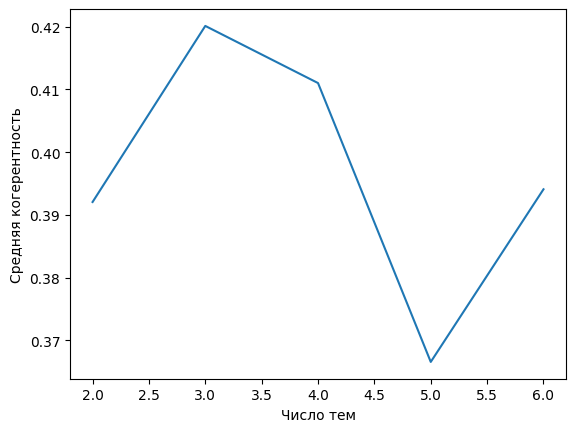

In [92]:
topics_list = [2, 3, 4, 5, 6]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data, dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [94]:
lda_3 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=3, chunksize=50, update_every=1, passes=2)

In [95]:
vis_data = gensimvis.prepare(lda_3, corpus, dictionary)
pyLDAvis.display(vis_data)

c:\Users\60053972\Anaconda3\envs\DS_in_medicine_2\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


### 4. проинтерпритировать получившиеся тематики

Анализ показал, что оптимально выделить 3 темы:
1. Срок возврата товара в магазин
2. Предосьавление услуг банком
3. Обслуживание детей поликлиникой на дому